In [14]:
import pandas as pd
import matplotlib.pyplot as plt

transactions = pd.read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [183]:
def tipo_transferencia(numero) -> str:
    if numero == 0:
        return "Legal"
    else:
        return "Fraude"
    
def dia(tiempo) -> int:
    dia = (tiempo - 86400) / 86400
    if dia > round(dia):
        return int(round(dia) + 1)
    else:
        return int(round(dia))

In [184]:
analisis = transactions[["target", "ammount", "timestamp"]]

In [185]:
analisis = analisis.rename(columns={"target":"Transferencia", "ammount":"Monto", "timestamp":"Tiempo"})

In [186]:
analisis["Transferencia"] = analisis["Transferencia"].map(tipo_transferencia)

In [187]:
analisis["Tiempo"] = analisis["Tiempo"].map(dia)

In [188]:
analisis_legal = analisis[ analisis.Transferencia == "Legal" ][ ["Monto", "Tiempo"] ]

In [189]:
analisis_legal

,Monto,Tiempo
0,68.50,0
1,29.00,1
2,59.00,1
3,50.00,1
4,50.00,1
...,...,...
501954,29.00,152
501955,312.95,152
501956,774.00,152
501957,226.00,152


In [190]:
analisis_fraude = analisis[ analisis.Transferencia == "Fraude" ][ ["Monto", "Tiempo"] ]

In [191]:
analisis_fraude

,Monto,Tiempo
203,445.000,1
240,37.098,1
243,37.098,1
245,37.098,1
288,155.521,1
...,...,...
501935,34.552,152
501936,34.552,152
501941,250.000,152
501942,100.000,152


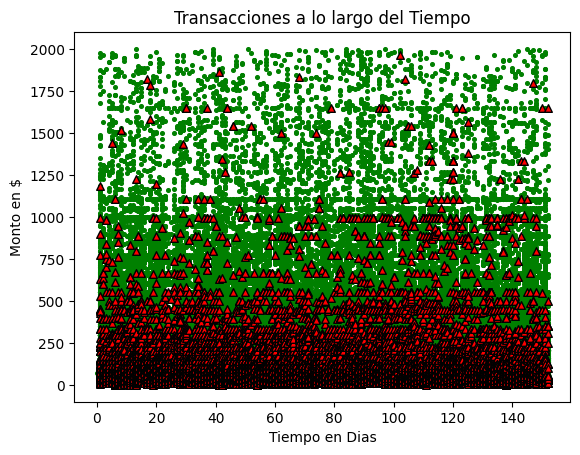

In [221]:
plt.scatter(x=analisis_legal[ analisis_legal.Monto <= 2000 ]["Tiempo"], y=analisis_legal[ analisis_legal.Monto <= 2000 ]["Monto"], c="green", s=7)
plt.scatter(x=analisis_fraude[ analisis_fraude.Monto <= 2000 ]["Tiempo"], y=analisis_fraude[ analisis_fraude.Monto <= 2000 ]["Monto"], c="red", s=30, marker="^", edgecolors="black", linewidths=1)
plt.title("Transacciones a lo largo del Tiempo")
plt.xlabel("Tiempo en Dias")
plt.ylabel("Monto en $")
plt.show()